In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold, datasets

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
# Target value y - flower type
# 0 - Setosa, 1 - Versicolor, 2 - Virginia
X = iris.data
Y = iris.target

PCA

In [5]:
pca = decomposition.PCA()
pca.fit(X)

PCA()

In [6]:
# Вычисляем дисперсии
explained_variance = pca.explained_variance_
explained_variance

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [10]:
# Критерий информативности. рУками
q = np.zeros(4)
for i in range(4):
    q[i] = explained_variance[i]/np.sum(explained_variance)

q

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [9]:
# Критерий информативности. Вычисляем относительную долю суммарной дисперсии
# Обусловленную одной, двумя, тремя и четырмя главными компонентами
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [11]:
# Сингулярные собственные значения
pca.singular_values_

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [12]:
# Проверим с пом-ю numpy полученные рез-ты
X = np.transpose(X)
# Вычислим ковариационную матрицу
covmat = np.cov(X)
covmat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [18]:
# Находим собственные зн-я и собственные векторы ковариаионной матрицы
A = np.linalg.eig(covmat)
# В первой части массива стоят собственные значения (Дисперсии)
# Cобственные вектора
A

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [19]:
# Собственные вектора
Eigvect = A[1]
Eigvect

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [22]:
# Выбираем первые две главные компоненты. рУками
MainComp = np.transpose(Eigvect[:, 0:2])
MainComp

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

In [23]:
# Строим массив данных для кластеризацииы
X_new = np.dot(MainComp, X)
X_new = np.transpose(X_new)
X_new

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709],
       [ 3.2215055 , -6.06828303],
       [ 2.68182738, -5.23749119],
       [ 2.87622016, -5.49033754],
       [ 2.6159824 , -4.74864082],
       [ 2.82960933, -5.21317833],
       [ 2.99541804, -5.97202148],
       [ 2.8896099 , -5.34168252],
       [ 2.71625587, -5.09184058],
       [ 2.27856139, -4.81555799],
       [ 2.85761474, -6.50571721],
       [ 3.1163261 , -6.66501491],
       [ 2.87883726, -6.13763209],
       [ 2.85406843, -5.63880172],
       [ 3.30254481, -6.19979162],
       [ 2.91437873, -5.84051289],
       [ 3.19210892, -5.71829851],
       [ 2.9586599 , -5.75994864],
       [ 2.28642572, -5.46042065],
       [ 3.19963195, -5.42566143],
       [ 3.14661108, -5.28967072],
       [ 2.99569623, -5.1809357 ],
       [ 3.03354506, -5.45790407],
       [ 2.94004523, -5.69467143],
       [ 2.86283042,

In [30]:
# SNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [25]:
k_means = KMeans(n_clusters=3).fit(X_new)

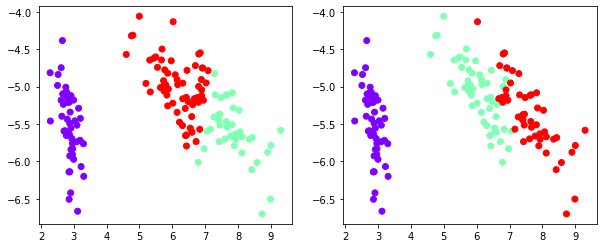

In [27]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
plt.scatter(X_new[:, 0], X_new[:, 1], c=k_means.labels_, marker='o', cmap='rainbow')

ax = fig.add_subplot(122)
plt.scatter(X_new[:, 0], X_new[:, 1], c=Y, marker='o', cmap='rainbow')

In [28]:
# Иерархическая кластеризация
AG_clustering = AgglomerativeClustering(n_clusters=3, 
                                        linkage='ward').fit(X_new) # Метод которым будем вычислять

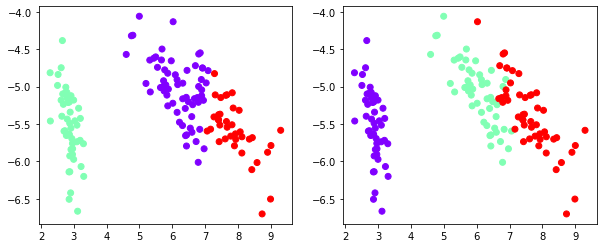

In [29]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
plt.scatter(X_new[:, 0], X_new[:, 1], c=AG_clustering.labels_, marker='o', cmap='rainbow')

ax = fig.add_subplot(122)
plt.scatter(X_new[:, 0], X_new[:, 1], c=Y, marker='o', cmap='rainbow')

In [31]:
# t-SNE
from sklearn.manifold import TSNE
import numpy as np

In [32]:
X = np.array(
    [[0.0, 0.0, 0.0], [0.0, 1.0, 1.0], [1.0, 0.0, 1.0], [1.0, 1.0, 1.0]]
)

In [34]:
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)
X_embedded

array([[ 97.54268 , 153.08118 ],
       [ 26.707186, 140.30156 ],
       [ 13.925768, 211.13649 ],
       [ 84.7613  , 223.91719 ]], dtype=float32)

In [48]:
# Пример
print(__doc__)

import sys

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import manifold, datasets

Automatically created module for IPython interactive environment


In [36]:
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

In [38]:
# Create DS
n_points = 2000
X, color = datasets.make_s_curve(n_points, random_state=10)
# n_neighbors = 10
n_components = 2

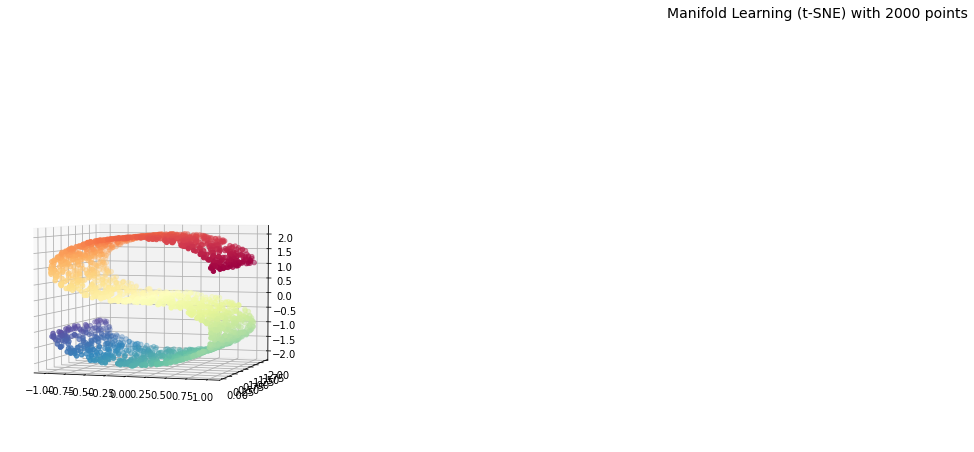

In [43]:
# create figure
fig = plt.figure(figsize=(30, 15))
fig.suptitle('Manifold Learning (t-SNE) with %i points' %(2000,), fontsize=14)

#Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

In [44]:
# Set-up manifold methods
methods = OrderedDict()

methods['t-SNE perplexity=5'] = manifold.TSNE(n_components=n_components,
                                             
                                             random_state=0,
                                             perplexity=5.0)
methods['t-SNE perplexity=15'] = manifold.TSNE(n_components=n_components,
                                             
                                             random_state=0,
                                             perplexity=15.0)
methods['t-SNE perplexity=30'] = manifold.TSNE(n_components=n_components,
                                             
                                             random_state=0,
                                             perplexity=30.0)
methods['t-SNE perplexity=50'] = manifold.TSNE(n_components=n_components,
                                             
                                             random_state=0,
                                             perplexity=50.0)

In [49]:
# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2+i+(i>3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
    ax.axis('tight')
plt.show()

t-SNE perplexity=5: 4.6 sec


c:\users\danil\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


t-SNE perplexity=15: 5.4 sec


c:\users\danil\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


t-SNE perplexity=30: 6.1 sec


c:\users\danil\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


t-SNE perplexity=50: 7.8 sec


c:\users\danil\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


Automatically created module for IPython interactive environment
t-SNE perplexity=5: 4.7 sec
t-SNE perplexity=15: 4.8 sec
t-SNE perplexity=30: 7.1 sec
t-SNE perplexity=50: 9.6 sec


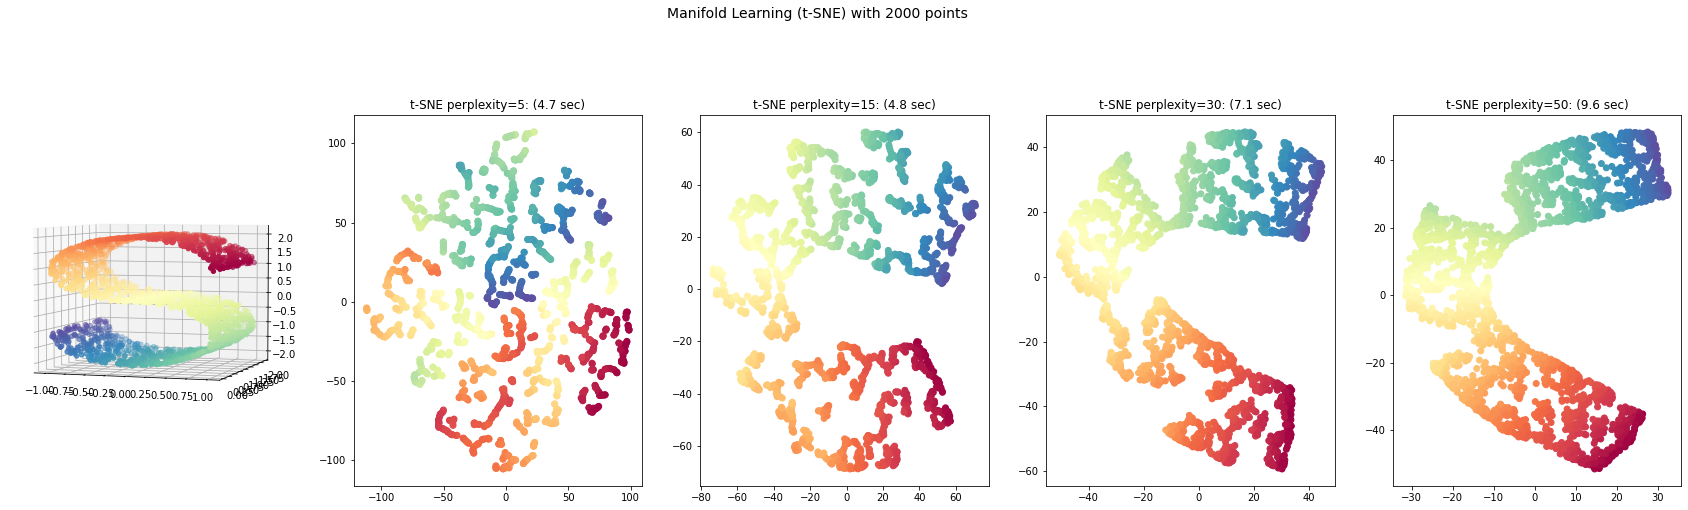

In [53]:
# Пример
print(__doc__)

import sys

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import manifold, datasets

Axes3D

# Create DS
n_points = 2000
X, color = datasets.make_s_curve(n_points, random_state=10)
# n_neighbors = 10
n_components = 2

# create figure
fig = plt.figure(figsize=(30, 15))
fig.suptitle('Manifold Learning (t-SNE) with %i points' %(2000,), fontsize=14)

#Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
methods = OrderedDict()

methods['t-SNE perplexity=5'] = manifold.TSNE(n_components=n_components,
                                             
                                             random_state=0,
                                             perplexity=5.0)
methods['t-SNE perplexity=15'] = manifold.TSNE(n_components=n_components,
                                             
                                             random_state=0,
                                             perplexity=15.0)
methods['t-SNE perplexity=30'] = manifold.TSNE(n_components=n_components,
                                             
                                             random_state=0,
                                             perplexity=30.0)
methods['t-SNE perplexity=50'] = manifold.TSNE(n_components=n_components,
                                             
                                             random_state=0,
                                             perplexity=50.0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2+i+(i>3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s: (%.2g sec)" % (label, t1 - t0))
    ax.axis('tight')
plt.show()